In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Add_sales_data_2018.csv")

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

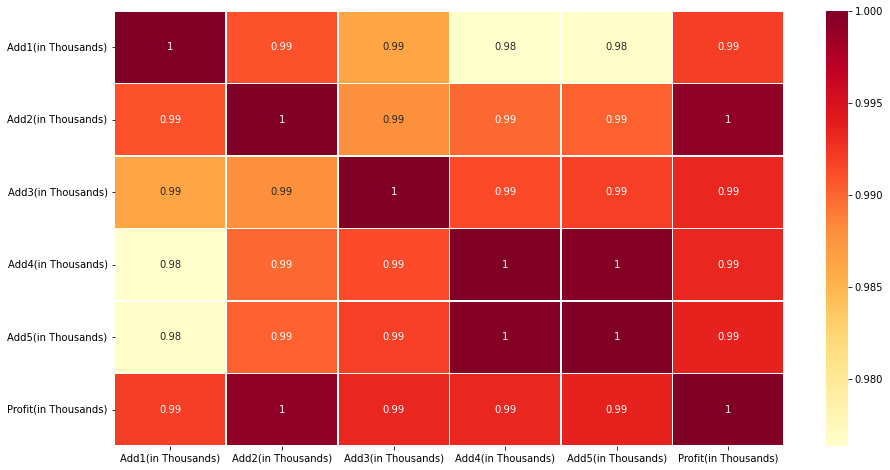

In [5]:
cmatrix = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cmatrix,annot = True, linewidth = 0.5, cmap = "YlOrRd")
plt.show()

In [6]:
#High Correlation exit among all the features in the table. 
# Profit has a high correlation with five different advertising companies

In [7]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
d1 = df.drop(['Date'],axis = 1)
d1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [9]:
y = d1['Profit(in Thousands)']
x = d1.drop(['Profit(in Thousands)','Add5(in Thousands)'],axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,random_state = 0,test_size = .25)

In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [12]:
model = lr.fit(xTrain.values,yTrain.values)

In [13]:
predictions = model.predict(xTest.values)

In [14]:
a = pd.DataFrame({'Actual value': yTest, 'Predicted value': predictions, "Difference":yTest-predictions})

In [15]:
a

,Actual value,Predicted value,Difference
52,4494.144,4493.680825,0.463175
181,5921.116,5921.047721,0.068279
5,4404.686,4404.315209,0.370791
18,4190.965,4191.019622,-0.054622
188,5880.541,5879.952763,0.588237
170,5728.804,5728.486997,0.317003
76,5225.140,5225.388505,-0.248505
154,5017.503,5017.308073,0.194927
104,5518.561,5518.295589,0.265411
33,4513.600,4514.516192,-0.916192


In [16]:
from sklearn.metrics import mean_squared_error
print("MSE is : ",mean_squared_error(yTest,predictions))

MSE is :  0.2296197221610621


In [17]:
from sklearn.metrics import r2_score
score=r2_score(yTest,predictions)
print("r2 socre is ",score)

r2 socre is  0.9999991343232526


# The MSE is 0.2296.... which suggest that values predicted are closer to the values actually got

In [18]:
row = [290,312,309,298]
rowpredict = model.predict([row])

In [19]:
a = rowpredict
rowpredict

array([5803.00377206])

In [20]:
row = [290,312,309,320]
rowpredict = model.predict([row])
rowpredict

array([5842.39066586])

In [21]:
a += rowpredict

print(a/2)

[5822.69721896]


## Profit of the company is 5822.69721896 (in thousands)**bold text**